<a id='begin'></a>
# Оглавление

- ### [Техническое задание](#task)
    - [Информация](#information)
    - [Датасеты](#datasets)
    
- ### [Изучение данных](#search)
    - [Анализ данных](#analysis)
    - [customers](#customers)
    - [sales](#sales)
    - [products](#products)

- ### [Объединение датасетов](#merge)

- ### [Сохранение датасета](#save)

<a id='task'></a>
# Техническое задание

<b>Цель:</b>
<br>Увеличить прибыль за счет приоритетного размещения товаров на складской зоне. Уменьшить затраты на транспортировку товара.
<br>
<br>
<b>Ожидаемый результат:</b>
<br>Отчет с обработанными данными. Интерактивный дашборд. Автоматизация отчета.
<br>
<br>
<b>Технические задачи:</b> 
<ul>
    <li>Анализ данных</li>
    <li>Предобработка данных</li>
    <li>Создание факторов</li>
    <li>Автоматизация предобработки и создания факторов</li>
    <li>Визуализация данных продающихся товаров</li>
</ul>
<br>
<b>Комментарий:</b>
<br>Определить целевые склады/регионы под продажу товара. Дополнительные сведения приветствуются.
<br>
<br>
<b>Источник данных:</b>
<br>База данных (SSMS)
<br>
<br>
<b>Возможные риски и решения:</b>
</br>
<ul>
    <li>Отсутствие BI системы у всех назначенных в задаче. <i><b>Решение:</b></i> Создание веб-сервиса.</li>
</ul>

<a id='information'></a>
# Информация

### Customers:

* <i>CustomerKey</i> : ID клиента
* <i> FirstName</i> : Имя клиента 
* <i> LastName</i> : Фамилия клиента
* <i> Full Name</i> : Имя и Фамилия клиента
* <i> BirthDate</i> : День рождения клиента
* <i> AgeOfCustomer</i> : Возраст клиента на момент заказа
<br> &#10149; (данные получены при помощи  BirthDate  и  DateFirstPurchase )
* <i> Gender</i> : Пол клиента
* <i> DateFirstPurchase</i> : Дата заказа товара 
* <i> Customer City</i> : Город клиента

### Sales:

* <i> ProductKey</i> : ID товара
* <i> OrderDateKey</i> : ID Даты заказа
* <i> DueDateKey</i> : ID Срока сдачи
* <i> ShipDateKey</i> : ID Даты отправки 
* <i> SalesOrderNumber</i> : Номер поставки
* <i> SalesAmount</i> : Объем продаж

### Products:

* <i> ProductKey</i> : ID клиента
* <i> ProductItemCode</i> : Серия товара 
* <i> Product Name</i> : Название товара
* <i> Sub Category</i> : Подкатегория товара
* <i> Product Category</i> : Категория товара
* <i> StandardCost</i> : Стоимость товара
* <i> Product Color</i> : Цвет товара
* <i> Product Size</i> : Размер товара 
* <i> Product Line</i> : Линия товара
* <i> Model Name</i> : Название модели
* <i> Product Description</i> : Описание товара
* <i> Product Description DE</i> : Описание товара на немецком  
* <i> Product Status</i> : Статус товара

# ------------ Статичные справочники ---------------

### Calendar

### Countries

## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 

from scipy import stats

import itertools
from itertools import combinations

import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

## Подготовленные ф-ии

In [2]:
# Проверка столбца (dtype object) на наличие уникальных значений и их количество 
def object_check(column):
    display(pd.DataFrame(column.value_counts()))
    print(column.unique())

# Проверка столбца (dtype float) с помощью гистограммы, 
# которая отображает характеристики выбранного столбца:
# (количество значений в столбце, среднее, стандартное отклонение, минимальное,
# 25-й процентиль, 50-й процентиль, 75-й процентиль и максимальное)
def float_check(column):
    column.hist()
    print(column.describe())


# Преобразование столбца при использовании dummy перменных
# ставим 1 - при наличии, 0 - при отсутствии
def find_item(cell):
    if item in cell:
        return 1
    return 0


# Проверка кол-ва пустых значений в столбце
def procent_check(column, df):
    math = round(100 - ((df[column].count() * 100) / len(df)))
    print(f'В столбце {column} отсутствует {str(math)}% информации.')
    
# Вывод основных статистических характеристик категориальных признаков
def categorical_check(column):
    display(pd.DataFrame(df[column].value_counts()))
    print(df[column].describe())

# Построение гистограммы и вывод основных статистических характеристик числовых признаков
def numerical_check(column):
    display(df[column].hist(bins=100))
    print(df[column].describe())
    

# Отображение начальных строк и информации о датасете
def df_check(df):
    display(df.head())
    display(df.info())
    
def replace_nan(df,column):
    return df[column].astype(str).apply(lambda x: 'Unknown' if x == 'nan' else x)

<a id='datasets'></a>
# Датасеты

In [3]:
# Клиенты
customers = pd.read_csv('DIM_Customer.csv', sep = ';')

# Товар
products = pd.read_csv('DIM_Product.csv', sep = ';')

# Онлайн продажа товара
sales = pd.read_csv('DIM_OnlineSales.csv', sep = ';')


# ------------ Статичные справочники ---------------
# Календарь
calendar = pd.read_csv('DIM_Calendar.csv', sep = ';')

# Список стран
countries = pd.read_csv('DIM_countries.csv', sep = ';')

#### [В начало](#begin)

<a id='search'></a>
# Изучение данных

Как было обозначено выше, calendat и countries являются статичными справочниками, их мы, пока что, пропустим.

### customers

In [4]:
customers.rename(columns = {'Customer City':'City'}, inplace = True)
df_check(customers)

,CustomerKey,FirstName,LastName,Full Name,BirthDate,AgeOfCustomer,Gender,DateFirstPurchase,City,Region Code,State Code
0,11000,Jon,Yang,JonYang,1971-10-06,47,Male,2018-01-19,Rockhampton,AU,QLD
1,11001,Eugene,Huang,EugeneHuang,1976-05-10,42,Male,2018-01-15,Seaford,AU,VIC
2,11002,Ruben,Torres,RubenTorres,1971-02-09,47,Male,2018-01-07,Hobart,AU,TAS
3,11003,Christy,Zhu,ChristyZhu,1973-08-14,44,Female,2017-12-29,North Ryde,AU,NSW
4,11004,Elizabeth,Johnson,ElizabethJohnson,1979-08-05,39,Female,2018-01-23,Wollongong,AU,NSW


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerKey        18484 non-null  int64 
 1   FirstName          18484 non-null  object
 2   LastName           18484 non-null  object
 3   Full Name          18484 non-null  object
 4   BirthDate          18484 non-null  object
 5   AgeOfCustomer      18484 non-null  int64 
 6   Gender             18484 non-null  object
 7   DateFirstPurchase  18484 non-null  object
 8   City               18484 non-null  object
 9   Region Code        18484 non-null  object
 10  State Code         18484 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.6+ MB


None

In [5]:
df_check(sales)

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,SalesOrderNumber,SalesAmount
0,381,20190101,20190113,20190108,16942,SO46700,"1000,4375"
1,375,20190101,20190113,20190108,15114,SO46701,"2181,5625"
2,369,20190101,20190113,20190108,15116,SO46702,"2443,35"
3,337,20190101,20190113,20190108,20576,SO46703,"782,99"
4,370,20190101,20190113,20190108,13059,SO46704,"2443,35"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58168 entries, 0 to 58167
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ProductKey        58168 non-null  int64 
 1   OrderDateKey      58168 non-null  int64 
 2   DueDateKey        58168 non-null  int64 
 3   ShipDateKey       58168 non-null  int64 
 4   CustomerKey       58168 non-null  int64 
 5   SalesOrderNumber  58168 non-null  object
 6   SalesAmount       58168 non-null  object
dtypes: int64(5), object(2)
memory usage: 3.1+ MB


None

In [6]:
df_check(products)

,ProductKey,ProductItemCode,Product Name,Sub Category,Product Category,StandardCost,Product Color,Product Size,Product Line,Model Name,Product Description,Product Description DE,Product Status
0,1,AR-5381,Adjustable Race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Current
1,2,BA-8327,Bearing Ball,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Current
2,3,BE-2349,BB Ball Bearing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Current
3,4,BE-2908,Headset Ball Bearings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Current
4,5,BL-2036,Blade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Current


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ProductKey              606 non-null    int64 
 1   ProductItemCode         606 non-null    object
 2   Product Name            606 non-null    object
 3   Sub Category            397 non-null    object
 4   Product Category        397 non-null    object
 5   StandardCost            395 non-null    object
 6   Product Color           352 non-null    object
 7   Product Size            299 non-null    object
 8   Product Line            380 non-null    object
 9   Model Name              397 non-null    object
 10  Product Description     396 non-null    object
 11  Product Description DE  396 non-null    object
 12  Product Status          606 non-null    object
dtypes: int64(1), object(12)
memory usage: 61.7+ KB


None

Сразу замечаем отсутствие данных в датасете products. В дальнейшем попробуем разобраться, возможно ли восстановление или нам придется удалить строки с наличием пустых значений.

<a id='analysis'></a>
# Анализ данных

<a id='customers'></a>
## customers

In [7]:
print('Кол-во строк:', len(customers['CustomerKey']))
print('Кол-во уникальных CustomerKey:', len(customers['CustomerKey'].unique())) 

Кол-во строк: 18484
Кол-во уникальных CustomerKey: 18484


Все ключи являются уникальными, а значит дублей среди индентификаторов не найдено.

<Axes: >

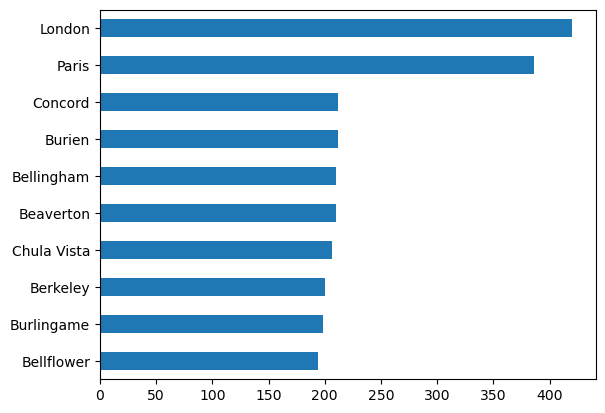

In [8]:
customers['City'].value_counts().head(10).sort_values().plot(kind='barh')

Посмотрим на распределение по половому признаку клиентов.

,Gender
Male,9351
Female,9133


['Male' 'Female']


<Axes: >

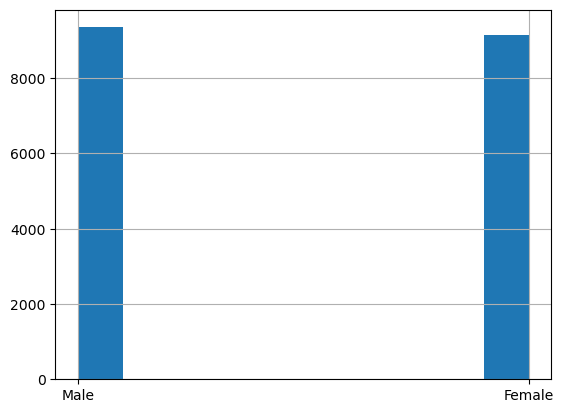

In [9]:
object_check(customers['Gender'])
customers['Gender'].hist()

Кол-во клиентов в разрезе городов.

In [10]:
customers['City'][customers['DateFirstPurchase'] == min(customers['DateFirstPurchase'])]

3           North Ryde
3501     Beverly Hills
10768        Metchosin
14863          Lebanon
17389           Pantin
Name: City, dtype: object

Города, в которых были сделаны первые заказы.

Преобразуем возрастные показатели, сгруппировав клиентов по возрастным группам. Сначала узнаем минимальный и максимальный возраста клиентов.

In [11]:
print('Минимальный возраст:',customers['AgeOfCustomer'].min())
print('Максимальный возраст:',customers['AgeOfCustomer'].max())

Минимальный возраст: 32
Максимальный возраст: 104


In [12]:
customers['AgeGroups'] = customers['AgeOfCustomer'
                                  ].apply(lambda x: 'over 100' if x > 100 else (
                                                    '80 - 100' if (x <= 100) & (x >= 80) else (
                                                    '60 - 80' if (x <= 79) & (x >= 60) else (
                                                    '50 - 60' if (x <= 59) & (x >= 50) else (
                                                    '40 - 50' if (x <= 49) & (x >= 40) else (
                                                    '30 - 40' if (x <= 39) & (x >= 30) else 'under 20'))))))

temp_df = pd.DataFrame(customers.groupby('AgeGroups')['CustomerKey'].count()).T

for col in sorted(temp_df.columns):
    temp_percentage = round(int(temp_df[col][0]) / len(customers['AgeGroups'])*100)
    print(f'Кол-во клиентов в возрастной группе {col}: {temp_df[col][0]}. Что составляет {temp_percentage}%.')

Кол-во клиентов в возрастной группе 30 - 40: 3328. Что составляет 18%.
Кол-во клиентов в возрастной группе 40 - 50: 6409. Что составляет 35%.
Кол-во клиентов в возрастной группе 50 - 60: 4589. Что составляет 25%.
Кол-во клиентов в возрастной группе 60 - 80: 3929. Что составляет 21%.
Кол-во клиентов в возрастной группе 80 - 100: 221. Что составляет 1%.
Кол-во клиентов в возрастной группе over 100: 8. Что составляет 0%.


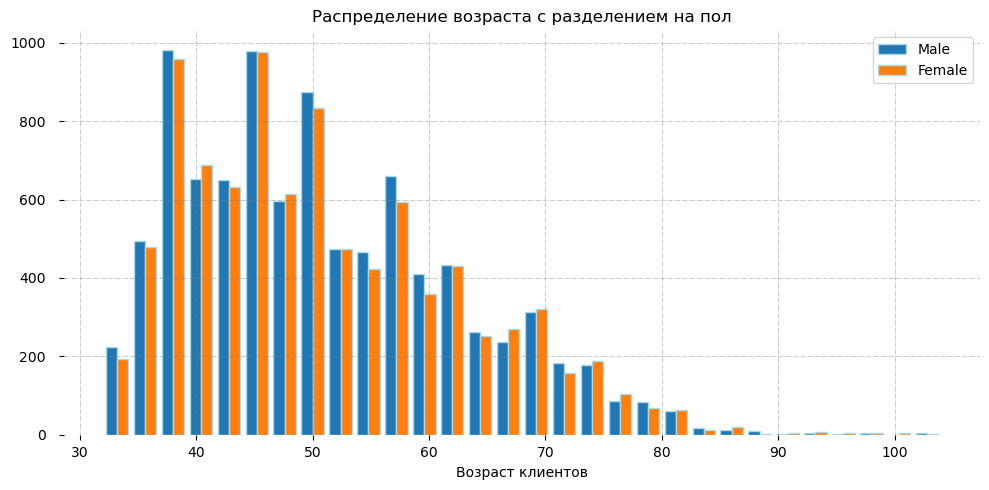

In [13]:
#customers.groupby('Gender')['AgeOfCustomer'].plot(kind='kde')
#customers['AgeOfCustomer'].hist()
legend = ['Male', 'Female']
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 5),
                        tight_layout = True)

for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)
    
#axs.xaxis.set_ticks_position('none')
#axs.yaxis.set_ticks_position('none')

axs.xaxis.set_tick_params(pad = 5)
axs.yaxis.set_tick_params(pad = 10)

axs.grid(color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)

#N, bins, patches = axs.hist(customers['AgeOfCustomer'], bins = 30, histtype='bar', ec='lightblue')
axs.hist([customers['AgeOfCustomer'][customers['Gender'] == 'Male'],
          customers['AgeOfCustomer'][customers['Gender'] == 'Female']],
         bins = 30, 
         histtype='bar', 
         ec='lightblue')
#axs.hist(customers['AgeOfCustomer'][customers['Gender'] == 'Female'], bins = 30, histtype='bar', ec='lightblue')

plt.xlabel("Возраст клиентов")
plt.legend(legend)
plt.title('Распределение возраста с разделением на пол')
 
# Show plot
plt.show()

In [14]:
# Проверяем датасет на наличие пустых значений
customers.columns[customers.isnull().any()]

Index([], dtype='object')

Отсавим все столбцы для дальнейшего объединения.

In [15]:
# Избавляемся ненужных столбцов

# -- FirstName
# -- LastName

# так как мы заранее создали столбец возраста 
# в SQL, удалим следующие столбцы:

# -- BirthDate
# -- DateFirstPurchase

#customers = customers.drop(['FirstName', 'LastName', 'BirthDate', 'DateFirstPurchase'], axis = 1)

<a id='sales'></a>
## sales

In [16]:
# Проверяем датасет на наличие пустых значений
sales.columns[sales.isnull().any()]

Index([], dtype='object')

In [17]:
# Избавляемся от ненужных столбцов:
# -- OrderDateKey
# -- DueDateKey
# -- ShipDateKey
# -- SalesOrderNumber

#sales = sales.drop(['DueDateKey', 'ShipDateKey', 'SalesOrderNumber'], axis = 1)

Поемняем тип данных у столбца SalesAmount.

In [18]:
sales['SalesAmount'] = pd.to_numeric(sales['SalesAmount'].str.replace(",", "."))

<a id='products'></a>
## products

In [19]:
# Проверяем столбцы, в которых пустые значения

products.columns[products.isnull().any()]

Index(['Sub Category', 'Product Category', 'StandardCost', 'Product Color',
       'Product Size', 'Product Line', 'Model Name', 'Product Description',
       'Product Description DE'],
      dtype='object')

В столбце Sub Category отсутствует 34% информации.
В столбце Product Category отсутствует 34% информации.
В столбце StandardCost отсутствует 35% информации.
В столбце Product Color отсутствует 42% информации.
В столбце Product Size отсутствует 51% информации.
В столбце Product Line отсутствует 37% информации.
В столбце Model Name отсутствует 34% информации.
В столбце Product Description отсутствует 35% информации.
В столбце Product Description DE отсутствует 35% информации.


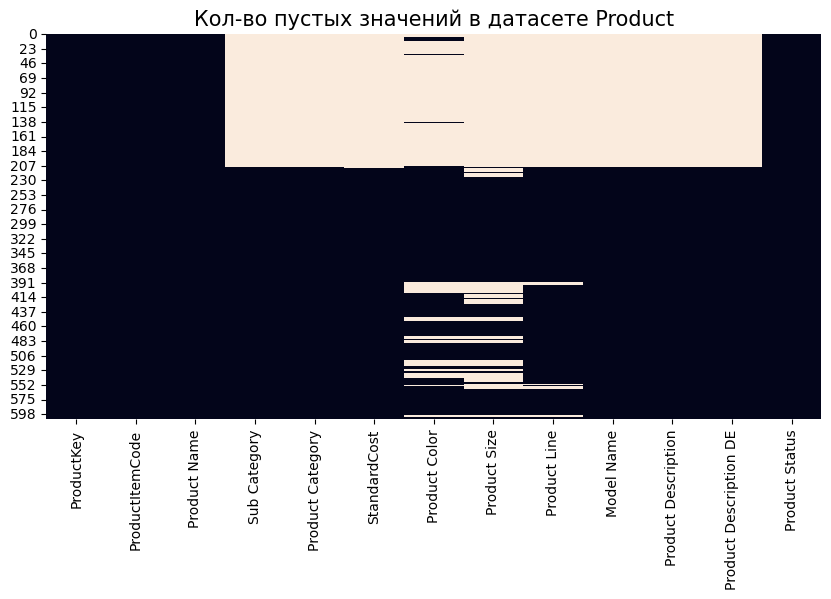

In [20]:
# Проверяем процент пустых значений
for col in products.columns[products.isna().sum() != 0]:
    procent_check(col, products)

fig, axes = plt.subplots(1,1, figsize=(10, 5))
sns.heatmap(products.isna(), ax=axes,
                    cbar = False)
axes.set_title(f'Кол-во пустых значений в датасете Product',
                          size=15)
plt.subplots_adjust(hspace=1);

Проверим минимальный и максимальный номера товаров.

In [21]:
print(f'Минимальный ProductKey в sales: {sales.ProductKey.min()}. В products: {products.ProductKey.min()}')
print(f'Максимальный ProductKey в sales: {sales.ProductKey.max()}. В products: {products.ProductKey.max()}')

Минимальный ProductKey в sales: 214. В products: 1
Максимальный ProductKey в sales: 606. В products: 606


Кол-во уникальных ключей в sales.

In [22]:
len(sales.ProductKey.unique())

133

Проверим какие товары (ProductKey) имеют пустые значения.

In [23]:
products['ProductKey'][products['StandardCost'].isna()].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [24]:
# Удаление невостребованных товаров.
#products.dropna(subset=['StandardCost'], inplace = True)

In [25]:
# Столбец -- StandardCost хранит в себе данные о стоимости товара
# Необходимо поменять тип этих данных и найти решение на замену 
# пустых показателей

#products["StandardCost"] = pd.to_numeric(products["StandardCost"].str.replace(',','.'))

Проверка наличия схожих товаров. При обнаружении удастся заполнить пустые значения.

In [26]:
search_for_null = products[products["StandardCost"].isna()]

search_for_null = search_for_null.groupby(products["StandardCost"].isna(), sort = True
                                         )['ProductItemCode'].value_counts().sort_values()
search_for_null

StandardCost  ProductItemCode
True          AR-5381            1
              LN-5818            1
              LN-6320            1
              LN-7161            1
              LN-7162            1
                                ..
              HN-7162            1
              HN-8320            1
              HN-9161            1
              HJ-7162            1
              TP-0923            1
Name: ProductItemCode, Length: 211, dtype: int64

Так как не удалось восстановить данные, мы избавляемся от пустых значений.

In [27]:
products = products[products['StandardCost'].notna()]

#### [В начало](#begin)

<a id='merge'></a>
# Объединение датасетов

In [28]:
users = pd.merge(customers, countries, on = 'City', how = 'left')
users.columns

Index(['CustomerKey', 'FirstName', 'LastName', 'Full Name', 'BirthDate',
       'AgeOfCustomer', 'Gender', 'DateFirstPurchase', 'City', 'Region Code',
       'State Code', 'AgeGroups', 'GeographyKey', 'StateProvinceCode',
       'StateProvinceName', 'CountryRegionCode', 'EnglishCountryRegionName',
       'SpanishCountryRegionName', 'FrenchCountryRegionName', 'PostalCode',
       'SalesTerritoryKey', 'IpAddressLocator'],
      dtype='object')

,CustomerKey
EnglishCountryRegionName,
United States,8139
United Kingdom,7834
France,6562
Germany,5150
Australia,3591
Canada,2382


<Axes: ylabel='EnglishCountryRegionName'>

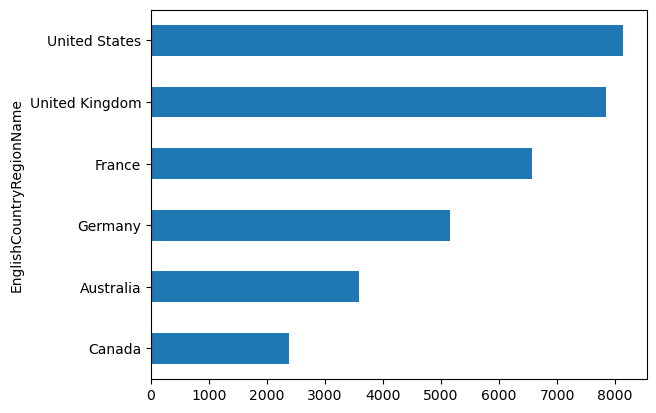

In [29]:
users = pd.merge(customers, countries, on = 'City', how = 'left')

# Проверяем кол-во клиентов в разрезе стран
display(pd.DataFrame(users.groupby(['EnglishCountryRegionName'])['CustomerKey'].count().sort_values(ascending = False)))
users.groupby(['EnglishCountryRegionName'])['CustomerKey'].count().sort_values(ascending = False
                                                                              ).head(10).sort_values().plot(kind='barh')

<Axes: ylabel='Product Category,Product Name'>

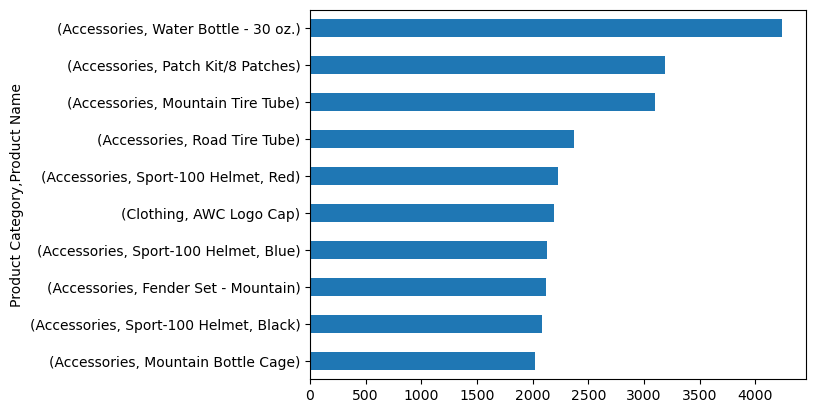

In [30]:
online_sales = pd.merge(sales, products, on = 'ProductKey', how = 'left')

# Проверяем самые популярные товары по категориям
online_sales.groupby(['Product Category', 'Product Name']
                    )['CustomerKey'].count().sort_values(ascending = False
                                                        ).head(10).sort_values().plot(kind='barh')

In [31]:
# Проверим самый дорогой сегмент по категориям товаров
online_sales.groupby(['Product Category', 'Product Name'])['StandardCost'].max().sort_values(ascending = False)

Product Category  Product Name         
Accessories       LL Mountain Tire         9,3463
                  ML Road Tire             9,3463
Clothing          Half-Finger Gloves, S    9,1593
                  Half-Finger Gloves, M    9,1593
                  Half-Finger Gloves, L    9,1593
                                            ...  
Accessories       Mountain Tire Tube       1,8663
                  Water Bottle - 30 oz.    1,8663
                  Touring Tire Tube        1,8663
                  Road Tire Tube           1,4923
                  Patch Kit/8 Patches      0,8565
Name: StandardCost, Length: 117, dtype: object

In [32]:
# Rename column
calendar = calendar.rename(columns = {'DateKey':'OrderDateKey'})

# ONLINE SALES + Calendar
full_sales = pd.merge(online_sales, calendar, on = 'OrderDateKey', how = 'left')

# FULL SALES + users
df = pd.merge(full_sales, users, on = 'CustomerKey', how = 'left')

Проверим полученный датасет.

In [33]:
df_check(df)

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,SalesOrderNumber,SalesAmount,ProductItemCode,Product Name,Sub Category,...,GeographyKey,StateProvinceCode,StateProvinceName,CountryRegionCode,EnglishCountryRegionName,SpanishCountryRegionName,FrenchCountryRegionName,PostalCode,SalesTerritoryKey,IpAddressLocator
0,381,20190101,20190113,20190108,16942,SO46700,1000.4375,BK-R64Y-38,"Road-550-W Yellow, 38",Road Bikes,...,220,93,Seine Saint Denis,FR,France,Francia,France,93000,7,198.51.100.221
1,375,20190101,20190113,20190108,15114,SO46701,2181.5625,BK-R89B-48,"Road-250 Black, 48",Road Bikes,...,176,SL,Saarland,DE,Germany,Alemania,Allemagne,70452,8,198.51.100.177
2,375,20190101,20190113,20190108,15114,SO46701,2181.5625,BK-R89B-48,"Road-250 Black, 48",Road Bikes,...,177,SL,Saarland,DE,Germany,Alemania,Allemagne,70511,8,198.51.100.178
3,369,20190101,20190113,20190108,15116,SO46702,2443.3500,BK-R89R-48,"Road-250 Red, 48",Road Bikes,...,133,HE,Hessen,DE,Germany,Alemania,Allemagne,34117,8,198.51.100.134
4,337,20190101,20190113,20190108,20576,SO46703,782.9900,BK-R50B-62,"Road-650 Black, 62",Road Bikes,...,244,ENG,England,GB,United Kingdom,Reino Unido,Royaume-Uni,C2H 7AU,10,198.51.100.245


<class 'pandas.core.frame.DataFrame'>
Int64Index: 108878 entries, 0 to 108877
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ProductKey                108878 non-null  int64  
 1   OrderDateKey              108878 non-null  int64  
 2   DueDateKey                108878 non-null  int64  
 3   ShipDateKey               108878 non-null  int64  
 4   CustomerKey               108878 non-null  int64  
 5   SalesOrderNumber          108878 non-null  object 
 6   SalesAmount               108878 non-null  float64
 7   ProductItemCode           108878 non-null  object 
 8   Product Name              108878 non-null  object 
 9   Sub Category              108878 non-null  object 
 10  Product Category          108878 non-null  object 
 11  StandardCost              108878 non-null  object 
 12  Product Color             55474 non-null   object 
 13  Product Size              38672 non-null   o

None

Избавимся от ненужных признаков.

In [34]:
df.drop(columns = ['Product Description DE', 'SpanishCountryRegionName', 'FrenchCountryRegionName'], inplace = True)

In [35]:
df['StandardCost'] = df['StandardCost'].apply(lambda x: float(str(x).replace(',', '.')))

In [36]:
# Проверим возраст клиентов, тем самым узнаем возраст ЦА
# дополнительно построим гистограмму, для наглядности

print(df.groupby(['Product Category', 'Sub Category'])['AgeOfCustomer'].value_counts())
print(df.groupby(['AgeOfCustomer'])['StandardCost'].sum().sort_values(ascending = False).head(10))

Product Category  Sub Category  AgeOfCustomer
Accessories       Bike Racks    44               48
                                43               45
                                48               29
                                63               26
                                54               24
                                                 ..
Clothing          Vests         87                1
                                92                1
                                96                1
                                97                1
                                103               1
Name: AgeOfCustomer, Length: 962, dtype: int64
AgeOfCustomer
45    1.254970e+06
44    1.208155e+06
46    1.141672e+06
43    1.072608e+06
40    1.065851e+06
47    1.005028e+06
48    9.512582e+05
41    9.467891e+05
42    9.181673e+05
39    8.694917e+05
Name: StandardCost, dtype: float64


Как мы видим, большой интерес проявляет ЦА возрастной группы от 40 до 50. Что не удивительно, с учетом кол-ва клиентов в данной  возрастной группе.
<br>
<br>Чтобы убедиться в верно выбранной стратегии - посмотрим на распределение возрастных групп. Чтобы отвергнуть или приянть нулевую гипотезу (среднее всех групп равны).

Чтобы уверенно опровергнуть или приянть нулевую гипотезу о равенстве средних возрастных групп, стоит сначала убедиться в нормальности распределения.
<br>
Для этого мы сначала визуально отобразим данные и посмотрим на наличие выбросов.

Text(0.5, 1.0, 'Checking Distribution')

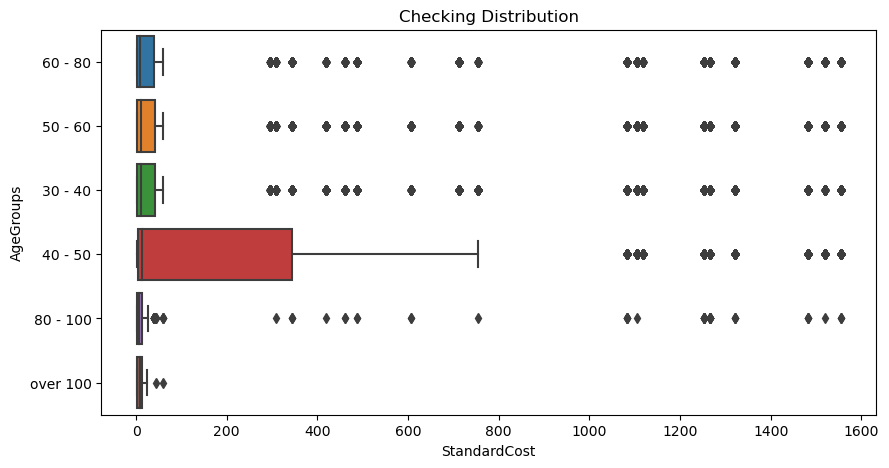

In [37]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.boxplot(x = 'StandardCost', y = 'AgeGroups', data = df)
ax.set_title('Checking Distribution')

Мы уже видим наличие больших выбросов, которые несомненно скажутся на распределение. В подобных случаях стоит избегать использование распределения Стьюдента, так как любые выбросы будут влиять на оценку p-value.
<br>
Визуально удостоверимся в распределении, используя QQ-plot (+ используя логарифмирование зависимой переменной), и проверим нормальность распределения с помощью теста Шапиро-Уилка.

In [50]:
import warnings

Group: 60 - 80, Shapiro Wilk Test : 0.0


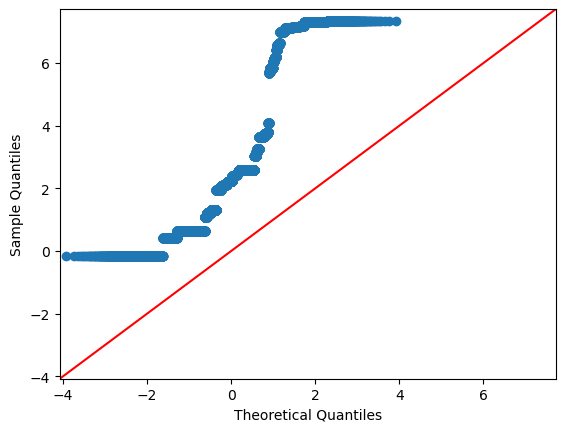

Group: 50 - 60, Shapiro Wilk Test : 0.0


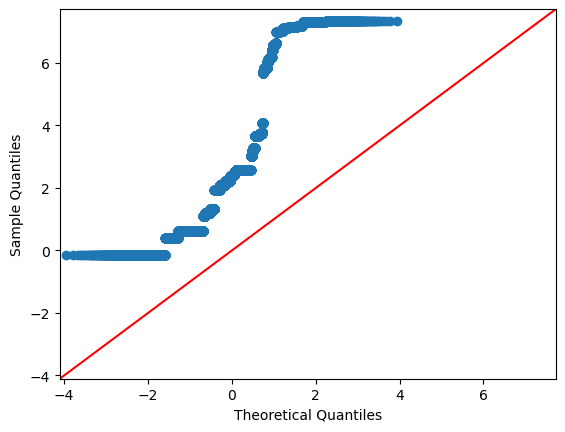

Group: 30 - 40, Shapiro Wilk Test : 0.0


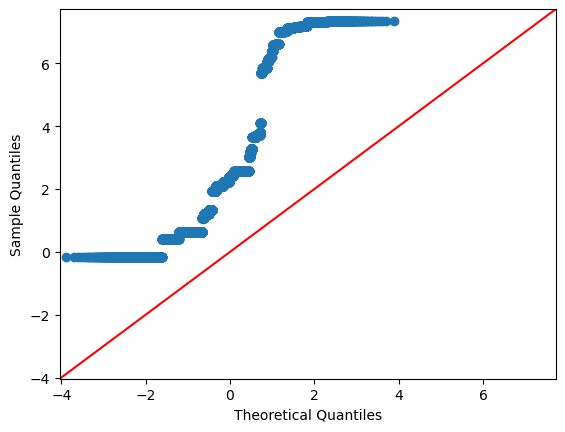

Group: 40 - 50, Shapiro Wilk Test : 0.0


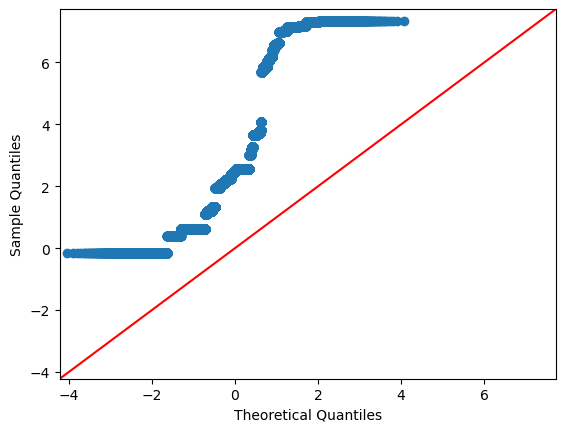

Group: 80 - 100, Shapiro Wilk Test : 0.0


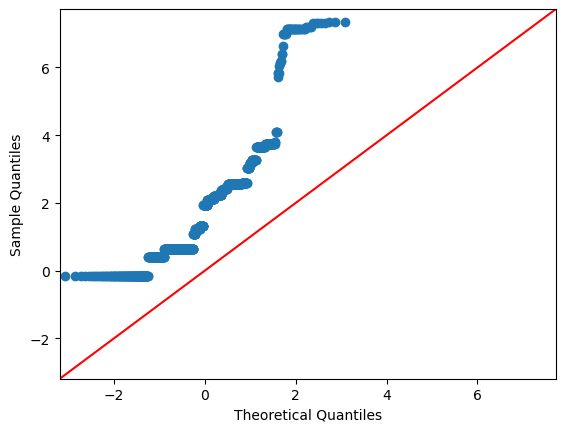

Group: over 100, Shapiro Wilk Test : 6.961535632399318e-07


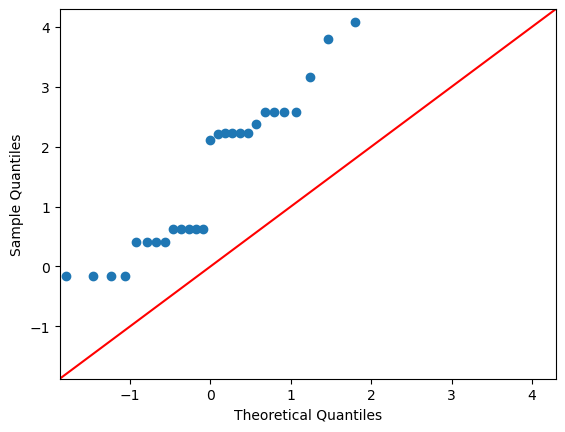

In [51]:
for group in list(df['AgeGroups'].unique()):
    print(f'Group: {group}, Shapiro Wilk Test : {stats.shapiro(df[df["AgeGroups"] == group]["StandardCost"])[1]}')
    fig = sm.qqplot(np.log(df[df['AgeGroups'] == group]['StandardCost']), line='45')
    plt.show()

Даже логарифмирование зависимой переменной не помогло. Абсолютно все группы имеют p-value меньше заданного (0.05), а значит нулевая гипотеза о нормальности распределения отвергается в пользу альтернативной гипотезы. Ненормальное распределение ставит под вопрос использование T - критерия.
<br>
Но выходом будет использование U-критерий Манна-Уитни - непараметрическая альтернатива Т - критерия для независимых выборок. Точность падает, но зато мы уменьшим влияение выбросов на оценку.

### Использование U-критерий Манна-Уитни

In [45]:
from scipy import stats

groups = df['AgeGroups'].unique()
Utest = []

alpha = 0.05

for index_1, value_1 in enumerate(groups):
        for index_2, value_2 in enumerate(groups):
            if index_2 > index_1:
                
                # Отбор групп
                group_1 = df[df['AgeGroups'] == value_1]['StandardCost']
                group_2 = df[df['AgeGroups'] == value_2]['StandardCost']
                
                # Считаем t-значение и p-value
                U, p = stats.mannwhitneyu(group_1, group_2, alternative = 'two-sided')
                Utest.append([f'{value_1} - {value_2}:', round(U, 4), round(p, 4)])

# Проверяем наличие значения p-value выше заданного альфа
for i in Utest:
    if i[2] > alpha:
        print(i)

['50 - 60 - 30 - 40:', 245279371.0, 0.0979]
['80 - 100 - over 100:', 13906.0, 0.4218]


Отвергаем нулевую гипотезу о равенстве средних возрастных групп в пользу альтернативной гипотезы для большинства групп.
<br>
<br>
Как мы видим, нулевая гипотеза принимается для групп от "80 - 100" и "over 100". С недоверием принимаем нулевую гипотезу для групп "50 - 60" и "30 - 40", т.к. при малом p-value можем столкнуться с ошибкой второго рода.
<br>
Стоит задуматься о проверки Т - критерия с поправкой Бонеферрони для вывода статистически значимых групп.

### Использование Т - критерия

In [49]:
from scipy import stats
from scipy.stats import ttest_ind

groups = df['AgeGroups'].unique()
ttest = []
# ftest = []

df_between = len(df['AgeGroups'].unique()) - 1
df_within = len(df['StandardCost']) - 2
df_total = df_between + df_within
# f_critic = stats.f.ppf(1-0.05, df_between, df_within)
#print(f_critic)
    
for index_1, value_1 in enumerate(groups):
        for index_2, value_2 in enumerate(groups):
            if index_2 > index_1:
                
                # Отбор групп
                group_1 = df[df['AgeGroups'] == value_1]['StandardCost']
                group_2 = df[df['AgeGroups'] == value_2]['StandardCost']
                
                # Считаем t-значение и p-value
                t, p = ttest_ind(group_1, group_2)
                ttest.append([f'{value_1} - {value_2}:', round(t, 4), round(p, 4)])
                
#                 group_1_mean = group_1.mean()
#                 group_2_mean = group_2.mean()
#                 total_sum = (sum(group_1) + sum(group_2)) / (len(group_1) + len(group_2))

#                 sst = sum((group_1 - total_sum)**2) + sum((group_2 - total_sum)**2)
#                 ssw = sum((group_1 - group_1_mean)**2) + sum((group_2 - group_2_mean)**2)
#                 ssb = sst - ssw

#                 msb = ssb / df_between
#                 msw = ssw / df_within
#                 f = msb / msw
#                 #print(index_1, index_2, value_1, value_2, f)
#                 if f < f_critic:
#                     ftest.append([f'{value_1} - {value_2}:', round(f, 4), round(f_critic, 4)])

# Поправка Бонферрони
threshold = 0.05/len(ttest)

# Если p-value больше заданного - опровергаем нулевую гипотезу о равенстве средних в пользу альтернативной гипотезы
for t in ttest:
    if t[2] > (threshold):
        print(f'{t[0]} T-value: {t[1]}, p-value: {t[2]}, T-critical: {round(stats.t.ppf(1-0.05, df_total), 4)}')

60 - 80 - over 100: T-value: 2.2575, p-value: 0.024, T-critical: 1.6449
50 - 60 - over 100: T-value: 2.5574, p-value: 0.0106, T-critical: 1.6449
30 - 40 - over 100: T-value: 2.5224, p-value: 0.0117, T-critical: 1.6449
40 - 50 - over 100: T-value: 2.7313, p-value: 0.0063, T-critical: 1.6449
80 - 100 - over 100: T-value: 1.1697, p-value: 0.2424, T-critical: 1.6449


Результаты предсказуемые, т.к. кол-во клинетов за 100 лет мало.

Проверим с помощью pairwise_tukeyhsd достоверность показателей.

In [254]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df['StandardCost'],
                          groups=df['AgeGroups'],
                          alpha=0.05)

tukey_frame = pd.DataFrame(data = tukey._results_table.data[1:], columns=tukey._results_table.data[0])
tukey_frame[tukey_frame['reject'] == False]

,group1,group2,meandiff,p-adj,lower,upper,reject
4,30 - 40,over 100,-211.8376,0.1461,-460.3378,36.6627,False
8,40 - 50,over 100,-243.7574,0.0580,-492.1656,4.6509,False
11,50 - 60,over 100,-228.9058,0.0911,-477.3634,19.5519,False
13,60 - 80,over 100,-190.8044,0.2431,-439.2762,57.6675,False
14,80 - 100,over 100,-59.4572,0.9849,-311.3052,192.3908,False


Топ 10 городов по заказам.

In [268]:
pd.DataFrame(df.groupby('City')['SalesAmount'].count().sort_values(ascending = False)).head(10)

,SalesAmount
City,
London,21616
Paris,14924
Berlin,8008
Shawnee,1647
Newton,1408
York,1221
München,1108
Westminster,1065
Burbank,1008


Посмотрим на распределение цены.

count    108878.000000
mean        395.485695
std         766.594458
min           2.290000
25%           7.950000
50%          28.990000
75%          69.990000
max        2443.350000
Name: SalesAmount, dtype: float64


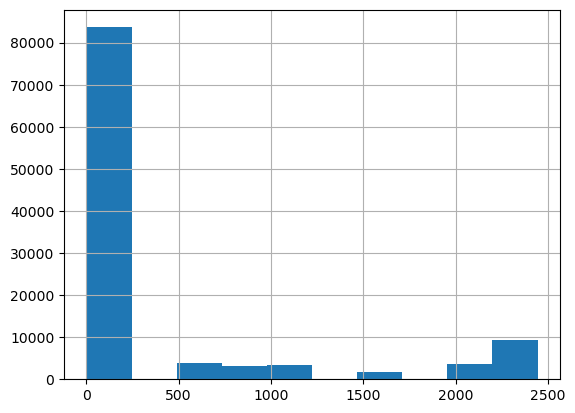

In [269]:
float_check(df['SalesAmount'])

Объем продаж.

count    108878.000000
mean        231.687701
std         453.505095
min           0.856500
25%           2.973300
50%          10.842300
75%          41.572300
max        1554.947900
Name: StandardCost, dtype: float64


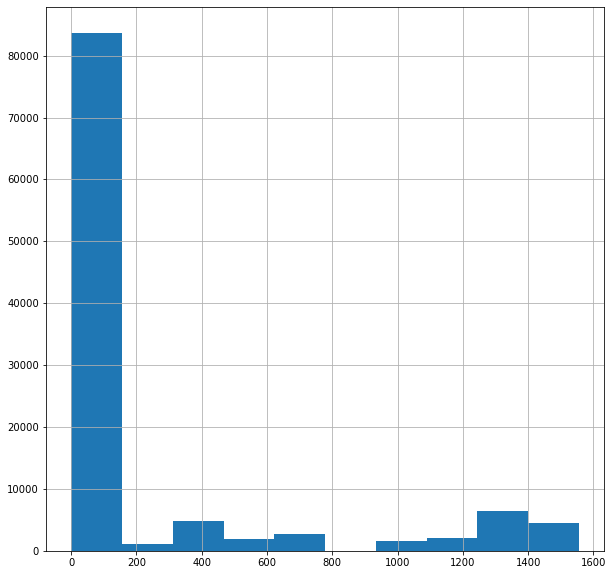

In [296]:
float_check(df['StandardCost'])

Проверим объем продаж в разрезе категорий и подкатегорий. Велосипеды - самая популярная категория.

In [270]:
sales_amount = df.groupby('Product Category')[['Sub Category','SalesAmount']].max().sort_values('SalesAmount', ascending = False)
sales_amount

,Sub Category,SalesAmount
Product Category,,
Bikes,Touring Bikes,2443.35
Accessories,Tires and Tubes,159.00
Clothing,Vests,69.99


Проверим самый ходовой среди всех товаров: Water Bottle - 30 oz.

Water Bottle - 30 oz.      7667
Patch Kit/8 Patches        5795
Road Tire Tube             5102
Mountain Tire Tube         5099
AWC Logo Cap               4344
Sport-100 Helmet, Red      4285
Sport-100 Helmet, Black    4249
Sport-100 Helmet, Blue     3924
Mountain Bottle Cage       3670
Fender Set - Mountain      3459
Name: Product Name, dtype: int64


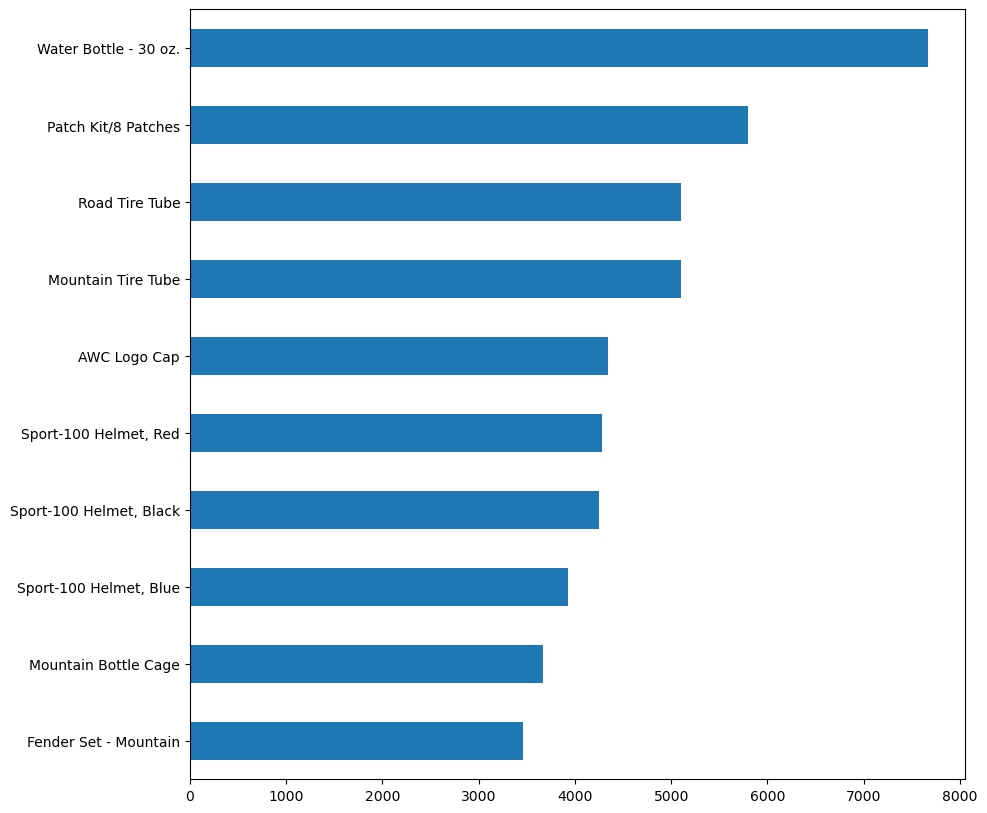

In [285]:
print(df['Product Name'].value_counts().sort_values(ascending = False).head(10))
plt.rcParams['figure.figsize'] = (10,10)
product_name = df['Product Name'].value_counts().sort_values(ascending = True).tail(10).plot(kind='barh')

Проверим теперь самый ходовой товар по категориям.

In [286]:
product_per_category = df.groupby('Product Name')[['Product Name','Sub Category','SalesAmount','City']
                                                 ].max().sort_values('SalesAmount', ascending = False)

def cost(column):
    sub_category = product_per_category[(product_per_category['Sub Category'] == column)]['Product Name'].max()
    city = product_per_category[(product_per_category['Sub Category'] == column)]['City'].max()
    return "Самый ходовой товар в категории " + column + ' : ' + sub_category + ' в городе ' + city

(*map(cost, df['Sub Category'].unique()),)

('Самый ходовой товар в категории Road Bikes : Road-750 Black, 58 в городе York',
 'Самый ходовой товар в категории Mountain Bikes : Mountain-500 Silver, 52 в городе York',
 'Самый ходовой товар в категории Bottles and Cages : Water Bottle - 30 oz. в городе York',
 'Самый ходовой товар в категории Touring Bikes : Touring-3000 Yellow, 62 в городе York',
 'Самый ходовой товар в категории Helmets : Sport-100 Helmet, Red в городе York',
 'Самый ходовой товар в категории Tires and Tubes : Touring Tire Tube в городе York',
 'Самый ходовой товар в категории Bike Stands : All-Purpose Bike Stand в городе Yakima',
 'Самый ходовой товар в категории Jerseys : Short-Sleeve Classic Jersey, XL в городе York',
 'Самый ходовой товар в категории Gloves : Half-Finger Gloves, S в городе York',
 'Самый ходовой товар в категории Fenders : Fender Set - Mountain в городе York',
 'Самый ходовой товар в категории Caps : AWC Logo Cap в городе York',
 'Самый ходовой товар в категории Socks : Racing Socks, M в гор

Товары с максимальной ценой по подкатегориям.

In [287]:
standard_cost = df.groupby('Product Name')[
        ['Product Name','Sub Category','StandardCost']
            ].max().sort_values('StandardCost', ascending = False)
def cost(column):
    sub_category = standard_cost[(standard_cost['Sub Category'] == column)]['Product Name'].max()
    return "Самый дорогостоящий товар в категории " + column + ' : ' + sub_category

(*map(cost, df['Sub Category'].unique()),)

('Самый дорогостоящий товар в категории Road Bikes : Road-750 Black, 58',
 'Самый дорогостоящий товар в категории Mountain Bikes : Mountain-500 Silver, 52',
 'Самый дорогостоящий товар в категории Bottles and Cages : Water Bottle - 30 oz.',
 'Самый дорогостоящий товар в категории Touring Bikes : Touring-3000 Yellow, 62',
 'Самый дорогостоящий товар в категории Helmets : Sport-100 Helmet, Red',
 'Самый дорогостоящий товар в категории Tires and Tubes : Touring Tire Tube',
 'Самый дорогостоящий товар в категории Bike Stands : All-Purpose Bike Stand',
 'Самый дорогостоящий товар в категории Jerseys : Short-Sleeve Classic Jersey, XL',
 'Самый дорогостоящий товар в категории Gloves : Half-Finger Gloves, S',
 'Самый дорогостоящий товар в категории Fenders : Fender Set - Mountain',
 'Самый дорогостоящий товар в категории Caps : AWC Logo Cap',
 'Самый дорогостоящий товар в категории Socks : Racing Socks, M',
 'Самый дорогостоящий товар в категории Hydration Packs : Hydration Pack - 70 oz.',
 'С

#### [В начало](#begin)

<a id='save'></a>
# Сохранение датасета

In [299]:
df.to_csv (r'dataframe.csv', index = False, header=True)